<a href="https://colab.research.google.com/github/ChristianKitte/HelloDecisionTree/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EA 11 - Aufgabe 2**

Erstellen eines Decision Trees mit Hilfe von sklearn und vorgegebenen Daten


---



Ein paar interessante Links:

http://christianherta.de/lehre/dataScience/entropy-informationGain.pdf

https://homes.cs.washington.edu/~shapiro/EE596/notes/InfoGain.pdf

https://www.saracus.com/blog/einfuehrung-in-decision-trees/  (Gini)

Im ersten Schritt binde ich die wichtigsten Bibliotheken ein. Für die Arbeit mit Decision Trees finden sich diese in sklearn.tree.

In [1]:
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from IPython.display import Image
import pydotplus #pip install pydotplus


print("Initialisierung abgeschlossen...")

Initialisierung abgeschlossen...


Basis der abschließenden Arbeit ist das Vorhandensein einer PNG Datei, welche den Graphen enthält. Im Folgenden erstelle ich eine Funktion, welche mir genau diese Datei erstellt.

Inspiriert wurde ich hierbei von dieser Arbeit : https://colab.research.google.com/github/daniyal9538/GeneralProjects/blob/master/Decision_Tree_Tutorial.ipynb#scrollTo=p_rX5UmQmn06.

Die Bibliothek pydotplus , bildet hierbei den zentralen Punkt und arbeitet auf der Ausgabe von Graphviz (Importe siehe oben).

In [2]:
def tree_graph_to_png(tree, feature_names,class_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, class_names=class_names,
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

print("Grafik vorbereitet...")

Grafik vorbereitet...


Decision Tree benötigt numerische Daten. Aktuell existieren jedoch nur kategorische Daten, weshalb diese umgewandelt werden müssen. Die Aufgabe könnte man auch mit einer Schleife oder einem one hot encoding ausführen. So ist es aber irgendwie nachvollziehbarer.

In [3]:
myDataRaw=pd.read_csv("https://raw.githubusercontent.com/ChristianKitte/HelloDecisionTree/main/DataSetEA11.csv")
myData=myDataRaw.iloc[:,1:]
print(myData.head(3))
print("")

myData["Age"] = myData["Age"].replace(["<=30","31...40",">40"],[0,1,2])
cur_group=myData.groupby(["Age"]).count()

myData["Income"] = myData["Income"].replace(["Low","Medium","High"],[0,1,2])
cur_group=myData.groupby(["Income"]).count()

myData["Student"] = myData["Student"].replace(["Yes","No"],[0,1])
cur_group=myData.groupby(["Student"]).count()

myData["Credit_rating"] = myData["Credit_rating"].replace(["Fair","Excellent"],[0,1])
cur_group=myData.groupby(["Credit_rating"]).count()

myData["Buys_computer"] = myData["Buys_computer"].replace(["Yes","No"],[0,1])
cur_group=myData.groupby(["Buys_computer"]).count()

cur_group

print("Recoding erledigt...")
myData.head(3)

       Age Income Student Credit_rating Buys_computer
0     <=30   High      No          Fair            No
1     <=30   High      No     Excellent            No
2  31...40   High      No          Fair           Yes

Recoding erledigt...


,Age,Income,Student,Credit_rating,Buys_computer
0,0,2,1,0,1
1,0,2,1,1,1
2,1,2,1,0,0


Es gibt eine Menge an Variationen für die Erzeugung und das Ausspielen eines Decision Trees und der Verwendung von sklearn. Ein paar hiervon habe ich ausprobiert. Daher auch die vielen Kommentare.

Im Kern werden die Daten in Labels (y) und Features (x) geteilt. Auf das Splitten in Trainings- und Testdaten habe ich verzichtet. 

Anschließend wird ein parametrierbarer Klassifizierer instanziiert und mit Hilfe der Methode fit "angepasst". Im Anschluss übergebe ich den nun einsatzbereiten Klassifizierer optional Arrays mit den Namen der Features und Labels.

Ich verzichte hier auf die Nutzung von Testdaten, da dies ohne weitere Auswertung nicht sinnvoll erscheint, ich aber aktuell leider keine Zeit hierfür habe. Aktuell lege ich somit den Fokus auf die Erstellung eines Decision Trees selbst. In der Praxis sollte dies jedoch auf Grund der vielen Einstellmöglichkeiten auf keinen Fall gemacht werden, um die beste Konfiguration zu finden. 

Ein paar interessante und hilfreiche Links sind:

https://scikit-learn.org/stable/modules/tree.html

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3

https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

https://datascience.stackexchange.com/questions/41417/how-max-features-parameter-works-in-decisiontreeclassifier

In [4]:
x=myData.iloc[:,:-1]
y=myData.iloc[:,4]

#criterion=entropy ==> Information Gain, alternativ Gini möglich
#max_features ==> Anzahl der berücksichtigten features

#myTree_clf_InformationGain=DecisionTreeClassifier(criterion="gini") # ==> default
myTree_clf_InformationGain=DecisionTreeClassifier(criterion="entropy")
#myTree_clf_InformationGain=DecisionTreeClassifier(criterion="entropy",max_features="log2")
#myTree_clf_InformationGain=DecisionTreeClassifier(criterion="entropy",max_features="sqrt")
#myTree_clf_InformationGain=DecisionTreeClassifier(criterion="entropy",max_features=auto)
#myTree_clf_InformationGain=DecisionTreeClassifier(criterion="entropy",max_features=4)

#myTree_clf_InformationGain=DecisionTreeClassifier(criterion="entropy",max_depth=3)
#myTree_clf_InformationGain=DecisionTreeClassifier(criterion="entropy",max_depth=2)

#Ich verzichte hier auf die Nutzung von Testdaten, da dies ohne weitere Auswertung nicht sinnvoll erscheint, ich 
#aber aktuell leider keine Zeit hierfür habe. In der Praxis sollte dies aber auf Grund der vielen Einstellungen
#gemacht werden, um die beste Konfiguration zu finden. Aktuell lege ich hier also den Fokus auf die Erstellung
#eines Decision Trees selbst.
myTree_clf_InformationGain.fit(x,y)

features=["Age","Income","Student","Credit_rating"]
classes=["Yes","No"]

Den Abschluss bildet die Ausgabe des Graphen. Hierzu wird in einem ersten Schritt eine PNG Datei erzeugt.

Anschließend kann der Graph oder seine textliche Repräsenz auf verschiedene Arten ausgegeben werden. Ein paar der Möglichkeiten sind im Code vermerkt.

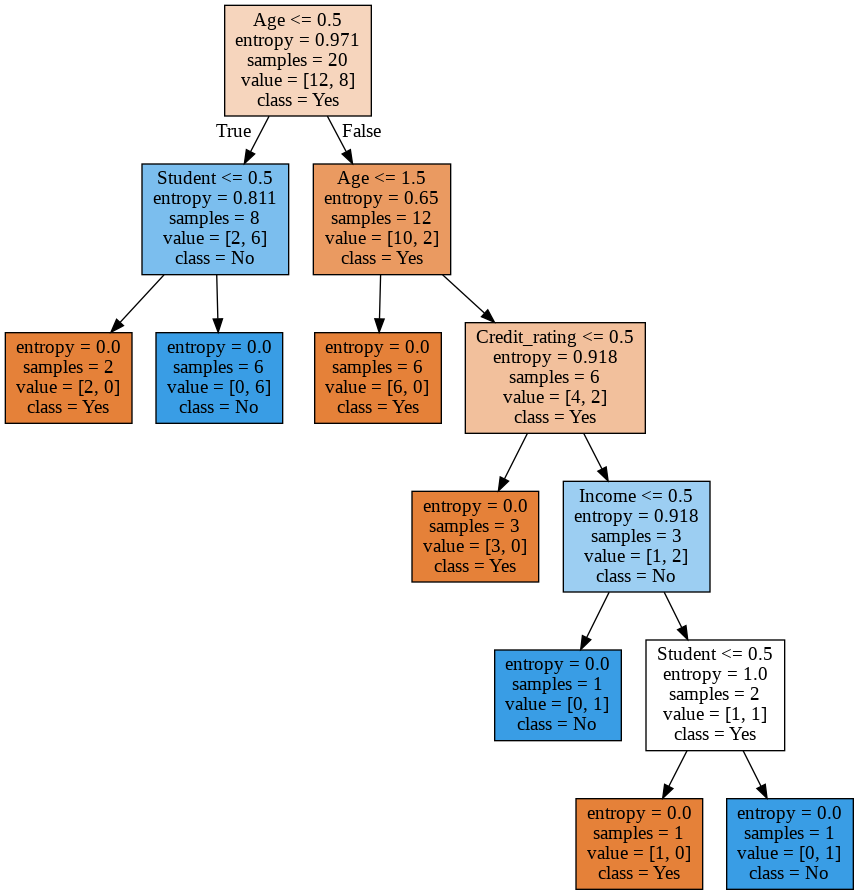

In [5]:
#######################
#Graphviz PNG
#Erzeugt dtree_my_InformationGain.png und gibt es aus
#######################
tree_graph_to_png(myTree_clf_InformationGain,features,classes,"dtree_my_InformationGain.png")
Image("dtree_my_InformationGain.png")

#######################
#Direkte Ausgabe Aufbau(Text) und Baum
#######################
#from sklearn import tree
#import graphviz # kann evtl. auch weggelassen werden

#tree.plot_tree(myTree_clf_InformationGain)

#######################
#PDF
#Erzeugt myData (Daten) und myData.pdf (Graph)
#######################
#import graphviz 
#from sklearn import tree

#dot_data = tree.export_graphviz(myTree_clf_InformationGain, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render("myData") 
#print("Die Datei myData.pdf wurde erzeugt...")

#myData